## 01. Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# path shortcut
path = r'/Users/nicolechiu/OneDrive - InterVarsity Christian Fellowship USA/Documents/CF Data Analytics/Achievement 6/07-2023 Employee Attrition'

In [4]:
# employee attrition dataframe creation
df_ea = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'employee_attrition_wrangled.6.2.csv'), index_col = False)

In [5]:
# Check dataframe
df_ea.head()

,Unnamed: 0,EmployeeID,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_full,termreason_desc,termtype_desc,status_year,status,business_unit,age_today,generation,manager?
0,0,1318,1/3/54,8/28/89,1/1/00,52,17,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,69,Boomers,Yes
1,1,1318,1/3/54,8/28/89,1/1/00,53,18,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,69,Boomers,Yes
2,2,1318,1/3/54,8/28/89,1/1/00,54,19,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,69,Boomers,Yes
3,3,1318,1/3/54,8/28/89,1/1/00,55,20,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,69,Boomers,Yes
4,4,1318,1/3/54,8/28/89,1/1/00,56,21,Vancouver,Executive,CEO,35,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,69,Boomers,Yes


## 02. Clean Data

In [6]:
# Drop Unnamed column
df_ea = df_ea.drop(columns = ['Unnamed: 0'])

In [8]:
# Check for missing values
df_ea.isnull().sum()

# No missing values

EmployeeID             0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_full            0
termreason_desc        0
termtype_desc          0
status_year            0
status                 0
business_unit          0
age_today              0
generation             0
manager?               0
dtype: int64

In [9]:
# Check for duplicates
dups = df_ea.duplicated()

dups.shape

# No duplicates

(49653,)

<Axes: xlabel='age', ylabel='Count'>

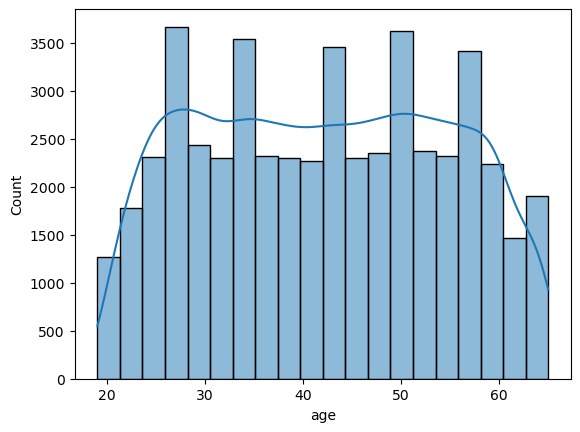

In [11]:
# Extreme values check of age
sns.histplot(df_ea['age'], bins=20, kde = True)

#Normal distribution

<Axes: xlabel='length_of_service', ylabel='Count'>

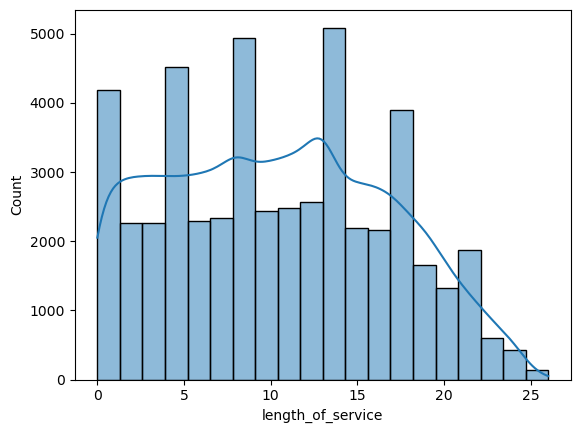

In [12]:
# Extreme values check of length of service

sns.histplot(df_ea['length_of_service'], bins=20, kde = True)

# Relatively normal distribution with slightleft-skew

## 03. Visual Data Exploration (Scatterplot)

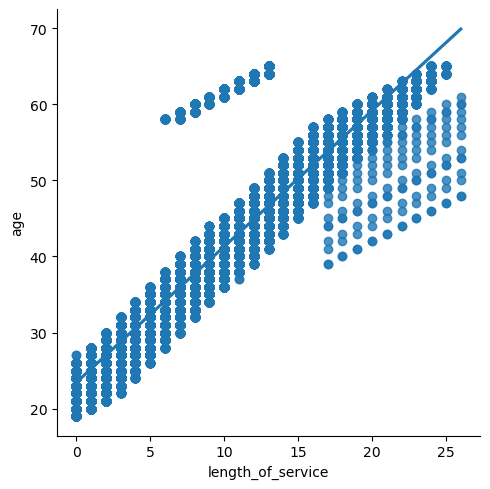

In [13]:
# Create a scatterplot for the "length of service" and "age" columns in seaborn

sns.lmplot(x = 'length_of_service', y = 'age', data = df_ea)

## 04. Hypothesis 

If an employee is 30 or below, they have a length of service less than 2 years. In other words, the younger an employee is, the less time they have been with the company.

## 05. Reshape the Variables

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_ea['age'].values.reshape(-1,1)
y = df_ea['length_of_service'].values.reshape(-1,1)

In [15]:
X

array([[52],
       [53],
       [54],
       ...,
       [21],
       [19],
       [20]])

In [17]:
y

array([[17],
       [18],
       [19],
       ...,
       [ 2],
       [ 0],
       [ 1]])

## 06. Split Data into Two Sets

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 07. Linear Regression

In [19]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## 08. Create a plot

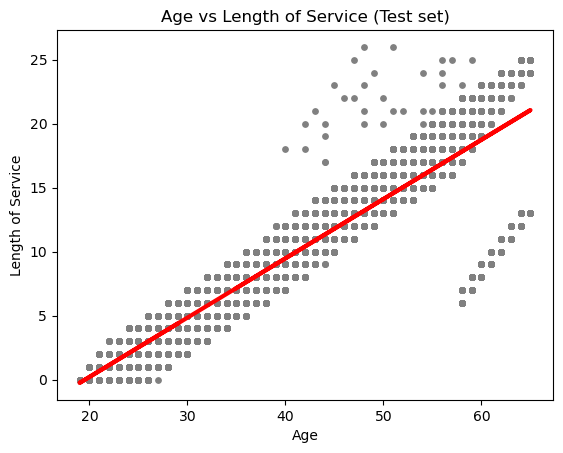

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs Length of Service (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Length of Service')
plot_test.show()

The line seems to fit in a balanced way, with clusters of data points above and below the line that are further from the line. The cluster above the line seem to be more spread out, while the cluster below the line seems to be more tightly together. I would conclude from this that the red line doesn't perfectly cover all the data points.

## 09. Check Model Performance Statistics

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.46358196]]
Mean squared error:  7.036881621975531
R2 score:  0.8247583173415487


## 10. Compare Predicted y values with Actual y values

In [25]:
y_predicted

array([[ 7.15696478],
       [12.2563663 ],
       [20.60084151],
       ...,
       [18.28293173],
       [19.21009564],
       [ 4.37547304]])

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,9,7.156965
1,13,12.256366
2,12,20.600842
3,11,9.011293
4,11,10.865620
5,3,2.984727
6,10,8.084129
7,17,14.574276
8,3,5.302637
9,8,8.547711


## 11. How well did the model perform on a test set?

I would conclude based on the MSE and r-squared values that the model performed relatively well, with the MSE relatively small at ~7 and the r-squared value being closer to 1 at ~0.8. However, when I create a dataframe comparing the actual and predicted values of y, there is still a bit of a difference in the actual and predicted values of y. 

So I would conclude that the model performed pretty well - there is positive, strong relationship between age and length of service - but not perfectly. This means there are still other factors at play. 

One potential bias is the natural aspect of time - of course in order to be at a company longer, you need to have lived more years. This makes it only natural that those who are older tend to have longer lengths of service. Other potential bias is that which I'm interested in - how bias plays into the recruitment and/or hiring process for the company. Perhaps the company only looks to hire right out of college, or focuses recruitment of high-stress jobs like cashier towards high schoolers or college students. Perhaps the company does not consider younger candidates for Director roles. This would bias the data and therefore bias the analysis.